In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Updated_sales.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_August_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_May_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_February_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_November_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_January_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_March_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_September_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_April_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sales_July_2019.csv
/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/Sa

In [2]:
import pandas as pd

# First step: Merge all 12 month of sales data into a single file

In [3]:
import os
import glob
#Change dir
os.chdir("/kaggle/input/sales-dataset-of-ecommerce-electronic-products/Sales_Data/")
# match all csv
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
sales_dataframe = pd.concat([pd.read_csv(f) for f in all_filenames ])
sales_dataframe


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


# **Data cleaning**

In [4]:
# Remove NaN values
nan_df = sales_dataframe[sales_dataframe.isna().any(axis=1)]
sales_dataframe = sales_dataframe.dropna(how='all')

In [5]:
# Remove dupicates
print("len: ", len(sales_dataframe.index))
sales_dataframe = sales_dataframe.drop_duplicates()
print("len with no duplicates: ", len(sales_dataframe.index))

len:  186305
len with no duplicates:  185687


In [6]:
# Remove row with header column names created when combining files
sales_dataframe = sales_dataframe[(sales_dataframe != sales_dataframe.columns).all(axis=1)]

In [7]:
# Correct datatype
sales_dataframe['Quantity Ordered'] = pd.to_numeric(sales_dataframe['Quantity Ordered'])
sales_dataframe['Price Each'] = pd.to_numeric(sales_dataframe['Price Each'])

# **Question 1: What was the best month for sales? How much was earned that month?**

In [8]:
# Split Order Date into Date and Hour
sales_dataframe[["Date", "Hour"]] = sales_dataframe["Order Date"].str.split(" ", expand=True)
# Split Date into Month,Day, and Year
sales_dataframe[["Month", "Day", "Year"]] = sales_dataframe["Date"].str.split("/", expand=True)
# Add a total column
sales_dataframe["Total"] = sales_dataframe["Quantity Ordered"]*sales_dataframe["Price Each"]

# Get sales per month
sales_per_month = sales_dataframe.groupby(sales_dataframe["Month"])["Total"].sum()
best_month = sales_per_month.idxmax()
sales_best_month = sales_per_month.max()

print(f"Best month: {best_month}, ${sales_best_month}")

Best month: 12, $4608295.7


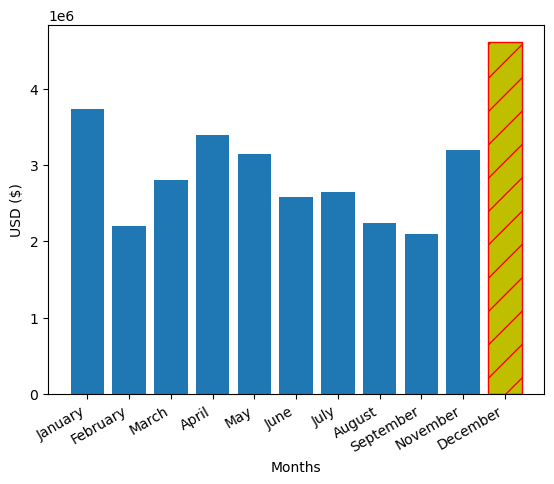

In [9]:
import calendar
import matplotlib.pyplot as plt

# Get month names
month_list = [calendar.month_name[int(item.strip("0"))] for item in sales_per_month.index.to_list()]

fig, ax = plt.subplots();
bar_graph = ax.bar(month_list, sales_per_month.values)

bar_graph[int(best_month)-1].set_facecolor('y')
bar_graph[int(best_month)-1].set_hatch("/")
bar_graph[int(best_month)-1].set_edgecolor('r')

plt.xticks(rotation=30, ha='right')
plt.ylabel("USD ($)")
plt.xlabel("Months")
plt.show()

# **Question 2. What city had the highest number of sales**

In [10]:
sales_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Month,Day,Year,Total
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08/31/19,22:21,08,31,19,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08/15/19,15:11,08,15,19,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08/06/19,14:40,08,06,19,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08/29/19,20:59,08,29,19,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08/15/19,19:53,08,15,19,7.68


In [11]:
# City From Purchase Address
sales_dataframe["City"] = sales_dataframe["Purchase Address"].apply(lambda x: f'{x.split(", ")[1]} ({x.split(", ")[2].split(" ")[0]})')
sales_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Month,Day,Year,Total,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08/31/19,22:21,08,31,19,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08/15/19,15:11,08,15,19,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08/06/19,14:40,08,06,19,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08/29/19,20:59,08,29,19,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08/15/19,19:53,08,15,19,7.68,New York City (NY)


In [12]:
# Get City with the greatest number of sales
# Get sales per month
city_sales_per_month = sales_dataframe.groupby(sales_dataframe["City"])["Total"].sum()
city_best_month = city_sales_per_month.idxmax()
sales_city_best_month = city_sales_per_month.max()

print(f"City with the greatst number of sales: {city_best_month}, ${sales_city_best_month}")

City with the greatst number of sales: San Francisco (CA), $8254743.55


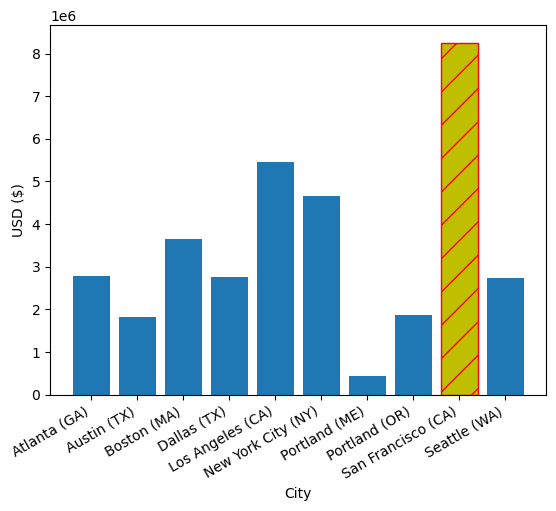

In [13]:
fig, ax = plt.subplots();
bar_graph = ax.bar(city_sales_per_month.index, city_sales_per_month.values)

# to get positional index
import numpy as np
indexes = np.arange(len(city_sales_per_month.index))
index_dict = {k:v for k, v in zip(city_sales_per_month.index, indexes)}

bar_graph[int(index_dict[city_sales_per_month.idxmax()])].set_facecolor('y')
bar_graph[int(index_dict[city_sales_per_month.idxmax()])].set_hatch("/")
bar_graph[int(index_dict[city_sales_per_month.idxmax()])].set_edgecolor('r')

plt.xticks(rotation=30, ha='right')
plt.ylabel("USD ($)")
plt.xlabel("City")
plt.show()

# **Question 3: What time should we display advertisements to maximize likelihood of curstomer's buying product?**

In [14]:
sales_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Month,Day,Year,Total,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08/31/19,22:21,08,31,19,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08/15/19,15:11,08,15,19,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08/06/19,14:40,08,06,19,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08/29/19,20:59,08,29,19,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08/15/19,19:53,08,15,19,7.68,New York City (NY)


In [15]:
# Get hours witouth minutes
month_list = [calendar.month_name[int(item.strip("0"))] for item in sales_per_month.index.to_list()]
sales_dataframe["Hour(24h)"] = sales_dataframe["Hour"].apply(lambda x: x.split(":")[0])
sales_dataframe.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Hour,Month,Day,Year,Total,City,Hour(24h)
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08/31/19,22:21,08,31,19,23.98,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08/15/19,15:11,08,15,19,99.99,Dallas (TX),15
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08/06/19,14:40,08,06,19,700.00,Portland (OR),14
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08/29/19,20:59,08,29,19,7.68,Los Angeles (CA),20
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08/15/19,19:53,08,15,19,7.68,New York City (NY),19


In [16]:
#Group hours in 24hrs format and graph the number of purchases by hour
sales_per_hour = sales_dataframe.groupby(sales_dataframe["Hour(24h)"]).size()
#sales_per_hour
best_hour = sales_per_hour.idxmax()
count_best_hour = sales_per_hour.max()

print(f"Best hour: {best_hour}, number of purchases: {count_best_hour}")

Best hour: 19, number of purchases: 12886


In [17]:
sales_per_hour.nlargest(5).index[1:]

Index(['12', '11', '18', '20'], dtype='object', name='Hour(24h)')

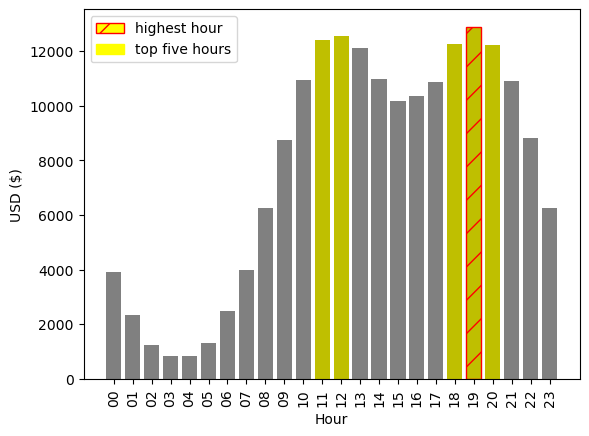

In [18]:
fig, ax = plt.subplots();
bar_graph = ax.bar(sales_per_hour.index, sales_per_hour.values,color="grey")

for x in sales_per_hour.nlargest(5).index:
    bar_graph[int(x)].set_facecolor('y')

bar_graph[int(best_hour)].set_hatch("/")
bar_graph[int(best_hour)].set_edgecolor('r')
    
colors = {'highest hour':'yellow', 'top five hours':'yellow'}
hatchs = {'highest hour':'/', 'top five hours':'/'}
edgecolors = {'highest hour':'red', 'top five hours':'yellow'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[label], hatch=hatchs[label], edgecolor=edgecolors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation="vertical")
plt.ylabel("USD ($)")
plt.xlabel("Hour")
plt.show()

# **Question 4. What products are most often sold together?**

In [19]:
# Get rows of Order ID with more than one purchase
aux_df = sales_dataframe[sales_dataframe["Order ID"].duplicated(keep=False)]

aux_df["Grouped"] = aux_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

aux_df = aux_df[["Order ID", "Grouped"]].drop_duplicates()

# Sort the data
aux_df['Grouped'] = aux_df['Grouped'].apply(lambda x: ','.join(sorted(x.split(','))))

aux_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"Apple Airpods Headphones,iPhone"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"USB-C Charging Cable,Vareebadd Phone"


In [20]:
from itertools import combinations
from collections import Counter

count=Counter()

#Get a list of the two most common products sold together
for row in aux_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key, value)

('Lightning Charging Cable', 'iPhone') 1011
('Google Phone', 'USB-C Charging Cable') 997
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 422
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 203
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129


# **Question 5. What product sold the most? Why do you think it sold the most?**

In [21]:

sales_dataframe["Quantity Ordered"] = sales_dataframe["Quantity Ordered"]
product_group = sales_dataframe.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
quantity_ordered.head(100)

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Quantity Ordered, dtype: int64

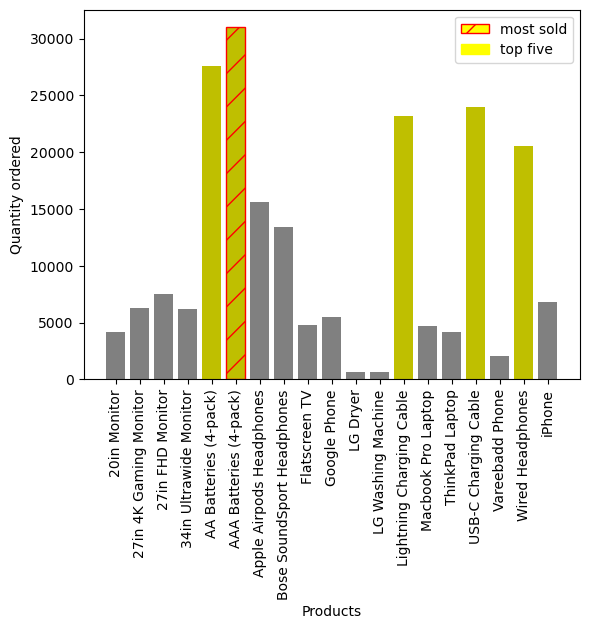

In [22]:
fig, ax = plt.subplots();
bar_graph = ax.bar(quantity_ordered.index, quantity_ordered.values,color="grey")

# to get positional index
indexes = np.arange(len(quantity_ordered.index))
index_dict = {k:v for k, v in zip(quantity_ordered.index, indexes)}

for x in quantity_ordered.nlargest(5).index:
    bar_graph[index_dict[x]].set_facecolor('y')

bar_graph[index_dict[quantity_ordered.nlargest(1).index[0]]].set_hatch("/")
bar_graph[index_dict[quantity_ordered.nlargest(1).index[0]]].set_edgecolor('r')
    
colors = {'most sold':'yellow', 'top five':'yellow'}
hatchs = {'most sold':'/', 'top five':'/'}
edgecolors = {'most sold':'red', 'top five':'yellow'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[label], hatch=hatchs[label], edgecolor=edgecolors[label]) for label in labels]
plt.legend(handles, labels)

plt.xticks(rotation="vertical")
plt.ylabel("Quantity ordered")
plt.xlabel("Products")
plt.show()

**These products may be sold the most due to their low cost. To validate this affirmation, we will analyze the actual price of the products seeking some correlation.**

In [23]:
sales_dataframe.head()
sales_dataframe["Price Each"] = sales_dataframe["Price Each"].astype("float32")
prices = sales_dataframe.groupby("Product").mean()["Price Each"]

print(prices)

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


[5, 4, 15, 17, 12]
[2.99, 3.84, 11.95, 11.99, 14.95]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


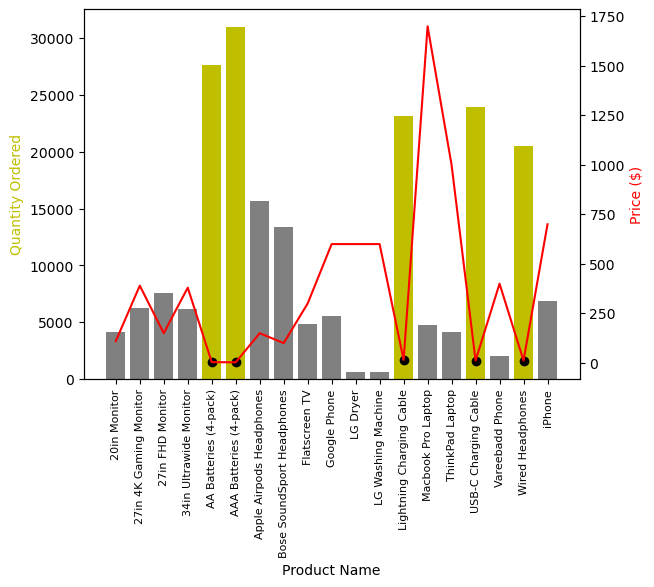

In [24]:
# plot two graph
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.bar(products, y1, 'g-')
bar_graph = ax1.bar(quantity_ordered.index, quantity_ordered.values,color="grey")
plot_graph = ax2.plot(quantity_ordered.index, prices.values,color="red")

for x in quantity_ordered.nlargest(5).index:
    bar_graph[index_dict[x]].set_facecolor('y')
    
smallest_prices = []
smallest_prices_idx = []
for x in prices.nsmallest(5).index:
    smallest_prices_idx.append(index_dict[x])
for x in prices.nsmallest(5).values:
    smallest_prices.append(x)
print(smallest_prices_idx)
print(smallest_prices)
ax2.scatter(smallest_prices_idx, smallest_prices,color="black")

    
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='y')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(quantity_ordered.index, rotation = "vertical", size=8)

plt.show()